In [4]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras import layers

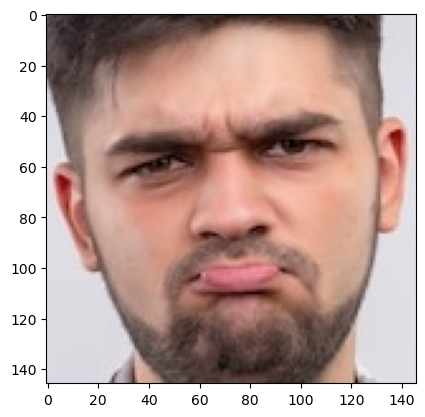

In [5]:

img_array = cv2.cvtColor(cv2.imread("data/train/0/aface_resim144.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img_array)
DataDirectory = "data/train/"
ValidationDirectory = "data/validation/"
classes = ["0","1","2","3"]

<function matplotlib.pyplot.show(close=None, block=None)>

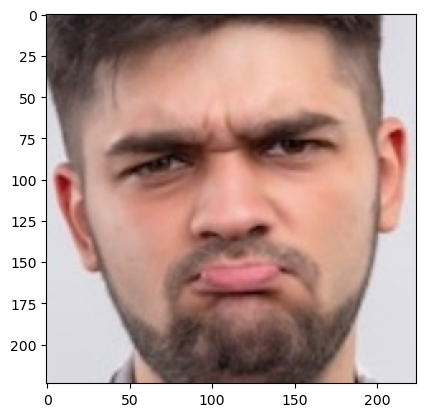

In [6]:
img_size= 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array)
plt.show


In [7]:
import os
import cv2

def create_training_data():
    training_data = []
    validation_data = []
    for category in classes:
        train_path = os.path.join(DataDirectory, category)
        validation_path = os.path.join(ValidationDirectory, category)
        class_num = classes.index(category)
        
        # Read training images
        for img in os.listdir(train_path):
            try:
                img_array = cv2.imread(os.path.join(train_path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
        # Read validation images
        for img in os.listdir(validation_path):
            try:
                img_array = cv2.imread(os.path.join(validation_path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (img_size, img_size))
                validation_data.append([new_array, class_num])
            except Exception as e:
                pass
        
        print("'{}' eklendi. Toplam {} training görüntü, {} validation görüntü.".format(category, len(training_data), len(validation_data)))
    
    return training_data, validation_data

In [8]:
training_data, validation_data = create_training_data()

'0' eklendi. Toplam 1292 training görüntü, 161 validation görüntü.
'1' eklendi. Toplam 3048 training görüntü, 380 validation görüntü.
'2' eklendi. Toplam 4540 training görüntü, 565 validation görüntü.
'3' eklendi. Toplam 5301 training görüntü, 661 validation görüntü.


In [9]:

random.shuffle(training_data)
random.shuffle(validation_data)

0


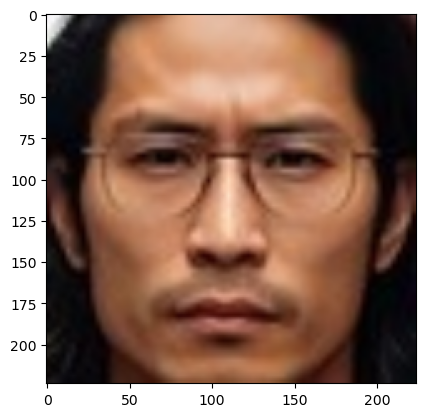

2


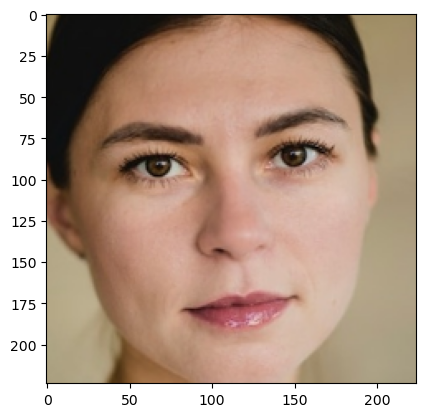

In [10]:
print(classes[training_data[18][1]])
plt.imshow(training_data[18][0])
plt.show()

print(classes[validation_data[19][1]])
plt.imshow(validation_data[19][0])
plt.show()


In [11]:
X_train = []
y_train = []
X_val = []
y_val = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

for features, label in validation_data:
    X_val.append(features)
    y_val.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)
X_val = np.array(X_val).reshape(-1, img_size, img_size, 3)
y_val = np.array(y_val)

In [12]:
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)

In [13]:

X_train /= 255.0
X_val /= 255.0

In [16]:
X_val[0]

array([[[0.7294118 , 0.6901961 , 0.6431373 ],
        [0.7294118 , 0.6901961 , 0.64705884],
        [0.7254902 , 0.6862745 , 0.64705884],
        ...,
        [0.7647059 , 0.7490196 , 0.7372549 ],
        [0.7647059 , 0.7490196 , 0.7372549 ],
        [0.7647059 , 0.7529412 , 0.73333335]],

       [[0.7254902 , 0.6862745 , 0.6392157 ],
        [0.7294118 , 0.6862745 , 0.6431373 ],
        [0.7254902 , 0.6862745 , 0.64705884],
        ...,
        [0.7607843 , 0.74509805, 0.73333335],
        [0.7607843 , 0.74509805, 0.73333335],
        [0.7607843 , 0.7490196 , 0.7294118 ]],

       [[0.72156864, 0.68235296, 0.6431373 ],
        [0.7254902 , 0.6862745 , 0.64705884],
        [0.7254902 , 0.6862745 , 0.64705884],
        ...,
        [0.7607843 , 0.74509805, 0.73333335],
        [0.75686276, 0.7411765 , 0.7294118 ],
        [0.75686276, 0.74509805, 0.7254902 ]],

       ...,

       [[0.7137255 , 0.6901961 , 0.6431373 ],
        [0.70980394, 0.6862745 , 0.6431373 ],
        [0.70980394, 0

In [15]:
X_val.shape

(661, 224, 224, 3)

In [17]:
model = tf.keras.applications.MobileNetV2()
base_input = model.layers[1].input
base_output = model.layers[-2].output

final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(len(classes), activation='softmax')(final_output)

In [18]:
new_model = tf.keras.Model(inputs=base_input, outputs=final_output)

In [19]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [20]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,430,468 (9.27 MB)

 Trainable params: 2,396,356 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [21]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [22]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('weights.{epoch:02d}.weights.h5', save_weights_only=True, save_freq='epoch')

new_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, callbacks=[checkpoint], batch_size = 16)

Epoch 1/25
332/332 ━━━━━━━━━━━━━━━━━━━━ 630s 2s/step - accuracy: 0.6782 - loss: 0.8284 - val_accuracy: 0.3328 - val_loss: 7.4396
Epoch 2/25
332/332 ━━━━━━━━━━━━━━━━━━━━ 581s 2s/step - accuracy: 0.7881 - loss: 0.5701 - val_accuracy: 0.3313 - val_loss: 6.3400
Epoch 3/25
332/332 ━━━━━━━━━━━━━━━━━━━━ 577s 2s/step - accuracy: 0.8222 - loss: 0.4835 - val_accuracy: 0.5371 - val_loss: 3.2289
Epoch 4/25
332/332 ━━━━━━━━━━━━━━━━━━━━ 574s 2s/step - accuracy: 0.8389 - loss: 0.4339 - val_accuracy: 0.5734 - val_loss: 3.3031
Epoch 5/25
332/332 ━━━━━━━━━━━━━━━━━━━━ 644s 2s/step - accuracy: 0.8467 - loss: 0.4079 - val_accuracy: 0.4887 - val_loss: 4.3488
Epoch 6/25
332/332 ━━━━━━━━━━━━━━━━━━━━ 592s 2s/step - accuracy: 0.8672 - loss: 0.3639 - val_accuracy: 0.5340 - val_loss: 3.7033
Epoch 7/25
332/332 ━━━━━━━━━━━━━━━━━━━━ 589s 2s/step - accuracy: 0.8796 - loss: 0.3308 - val_accuracy: 0.7458 - val_loss: 2.2997
Epoch 8/25
332/332 ━━━━━━━━━━━━━━━━━━━━ 594s 2s/step - accuracy: 0.8920 - loss: 0.2986 - val_accu

In [23]:
new_model.save('kotusonmodel.keras')

In [24]:
new_model.save('kotusonmodel.h5')

In [130]:
frame = cv2.imread('test\0\face_resim57.jpg')

In [131]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


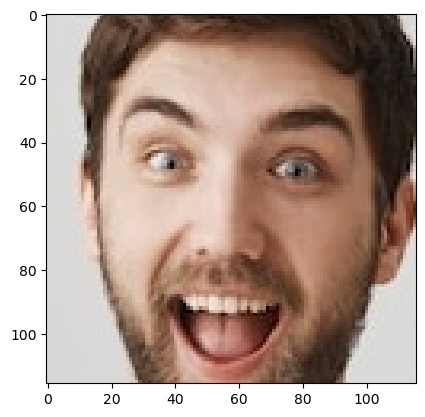

In [139]:

frame = cv2.cvtColor(cv2.imread("data/test/1/face_resim57.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(frame)

In [140]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray.shape

(116, 116)

In [141]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w] 
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew] 


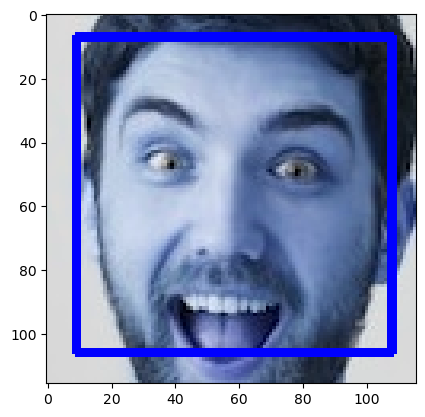

In [142]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

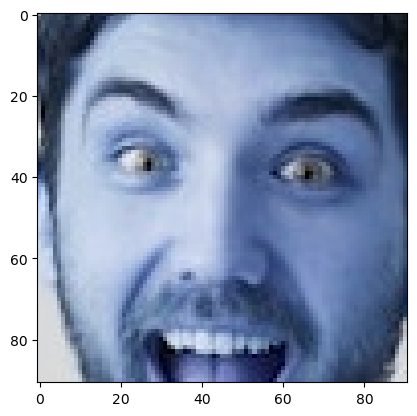

In [143]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [144]:
final_imagex = cv2.resize(frame, (224,224)) 
final_image = np.expand_dims (final_imagex, axis =0) 
final_image=final_image/255.0 

In [145]:
Predictions = new_model.predict(final_image)
predicted_class = np.argmax(Predictions)
emotion_label = classes[predicted_class]

print(emotion_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
0


In [146]:
y.shape

()

In [106]:
X.shape

(12000, 224, 224, 3)